In [13]:
from scipy import ndimage
import matplotlib.pyplot as plt
import imageio
import PIL
import numpy as np
import cv2
import skimage

Задание на практику.

1. Изучить блокнот.
1. Повторить на других изображениях.
1. Найти еще не менее 3х фильтров, которые применяются для работы с изображениями.
1. Применить найденные фильтры.

In [14]:
!pip install scipy
!pip install  matplotlib
!pip install  imageio
!pip install  pillow
!pip install  numpy
!pip install  scikit-image
!pip install opencv-python
!pip install scikit-learn
!pip install tensorflow
!pip install torchvision


In [15]:
!curl -o "0d77695785e94a792272f4779071bfd6.jpg" "https://id.pinterest.com/pin/807270301988016448/"



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  826k    0  826k    0     0  1472k      0 --:--:-- --:--:-- --:--:-- 1471k


In [16]:
import cv2

In [17]:
image = cv2.imread("0d77695785e94a792272f4779071bfd6.jpg")

Фильтр Шарра - оператор выделения границ на изображении, основанный на вычислении градиента яркости. Выделяет границы объектов, показывая места резкого изменения яркости. Является улучшенной версией фильтра Собеля для ядер 3x3

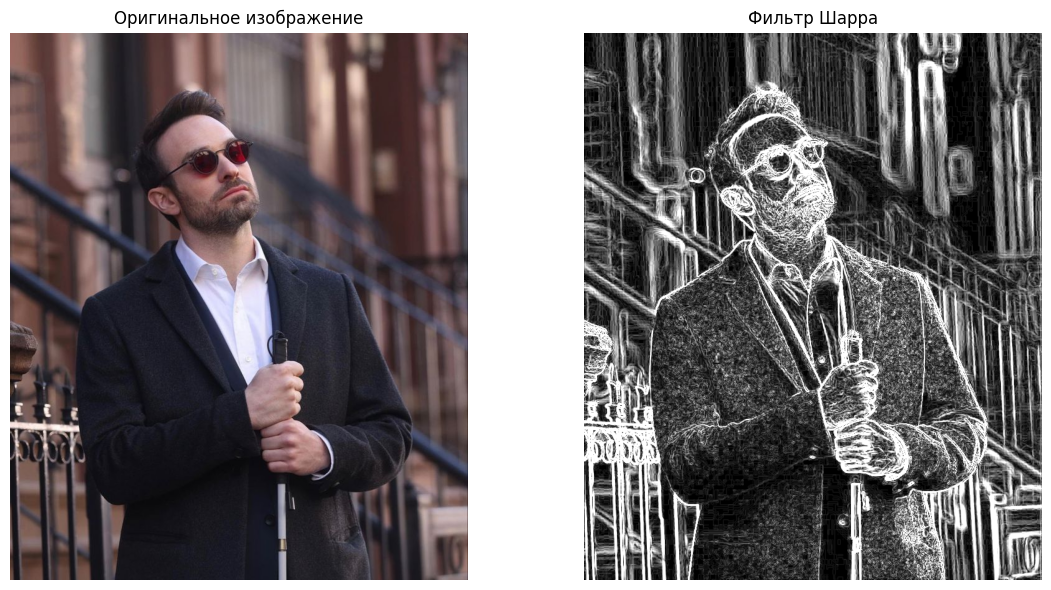

In [53]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

url = "https://i.pinimg.com/736x/0d/77/69/0d77695785e94a792272f4779071bfd6.jpg"

resp = urllib.request.urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# серый
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# сам фильтр
scharr_x = cv2.Scharr(gray, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(gray, cv2.CV_64F, 0, 1)
scharr = np.sqrt(scharr_x**2 + scharr_y**2)
scharr = np.uint8(np.clip(scharr, 0, 255))

#  из BGR в RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# результаты
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_rgb)
axes[0].set_title('Оригинальное изображение')
axes[0].axis('off')

axes[1].imshow(scharr, cmap='gray')
axes[1].set_title('Фильтр Шарра')
axes[1].axis('off')

plt.tight_layout()
plt.show()

Фильтр "Тиснение" - создаёт эффект объёмного изображения

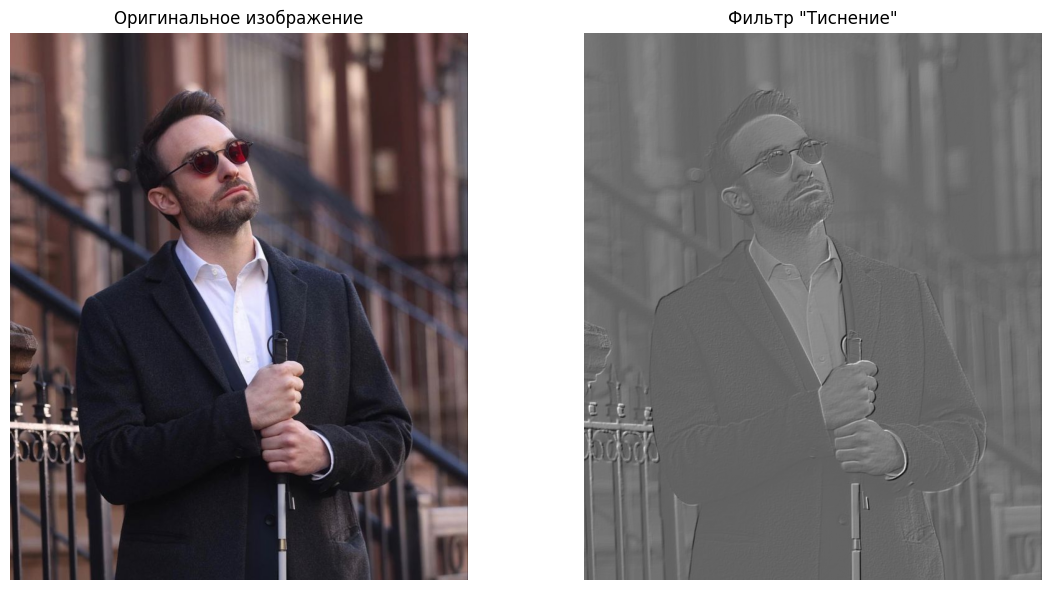

In [60]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

url = "https://i.pinimg.com/736x/0d/77/69/0d77695785e94a792272f4779071bfd6.jpg"

resp = urllib.request.urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# серый
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# для эффекта тиснения
kernel_emboss = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])

# сам фильтр
emboss = cv2.filter2D(gray, cv2.CV_64F, kernel_emboss)


# из BGR в RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# результаты
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_rgb)
axes[0].set_title('Оригинальное изображение')
axes[0].axis('off')

axes[1].imshow(emboss, cmap='gray')
axes[1].set_title('Фильтр "Тиснение"')
axes[1].axis('off')

plt.tight_layout()
plt.show()


Эффект "масляной живописи" имитирует художественный стиль, делая изображение похожим на картину

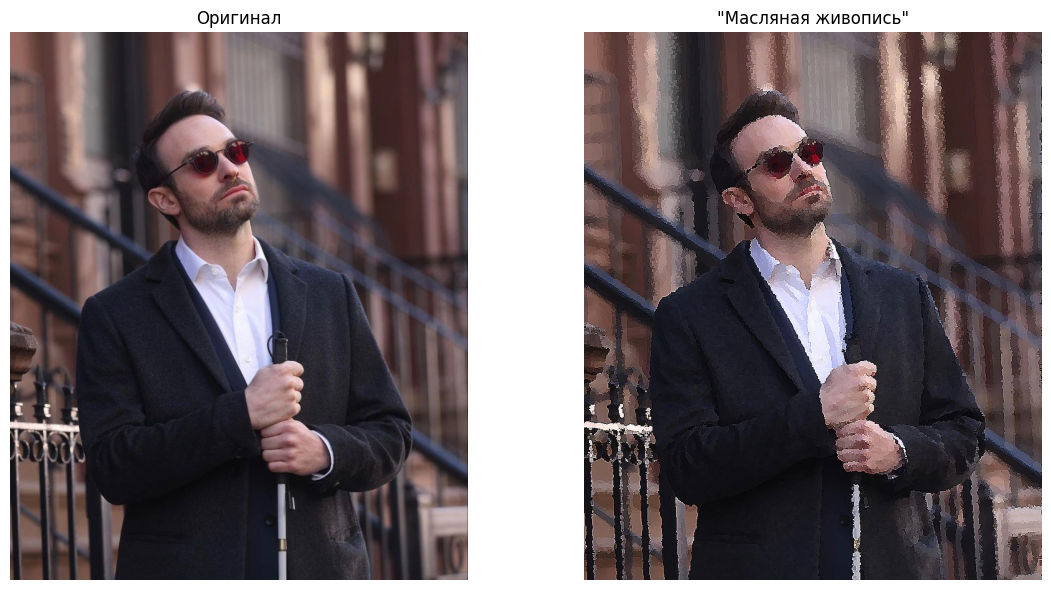

In [59]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

url = "https://i.pinimg.com/736x/0d/77/69/0d77695785e94a792272f4779071bfd6.jpg"

resp = urllib.request.urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# сам фильтр
oil_effect = cv2.xphoto.oilPainting(image, 3, 1)

# повышение резкости
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
oil_final = cv2.filter2D(oil_effect, -1, kernel_sharpen)

# из BGR в RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
oil_rgb = cv2.cvtColor(oil_final, cv2.COLOR_BGR2RGB)

# результаты
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_rgb)
axes[0].set_title('Оригинал')
axes[0].axis('off')

axes[1].imshow(oil_rgb)
axes[1].set_title('"Масляная живопись"')
axes[1].axis('off')

plt.tight_layout()
plt.show()